# Titanic Dataset Survival Prediction using Tensorflow

The Titanic dataset is a well-known dataset that contains information about passengers on the Titanic, including demographic information, ticket fare, cabin class, and whether or not they survived the ship's sinking. 

#### Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization

from sklearn.metrics import confusion_matrix

#### Importing Data

In [3]:
df = pd.read_excel("D:\Data Science\Deep Learning\Assignments\Worksheet in Assignment - Titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal PQ / Chesterville ON
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal PQ / Chesterville ON
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [6]:
np.round(df.isnull().sum()*100/df.shape[0],2)

pclass        0.00
survived      0.00
name          0.00
sex           0.00
age          20.09
sibsp         0.00
parch         0.00
ticket        0.00
fare          0.08
cabin        77.46
embarked      0.15
boat         62.87
body         90.76
home_dest    43.09
dtype: float64

Missing data in %: 

Age : 20% <br>
Cabin: 77% <br>
Embarked: 0.15% <br>
Boat 62% <br>
Body : 90% <br>
Home_dest : 43% <br>

I will remove the rows with missing values from embarked as only 2 values are missing. Similarly Fare has 1.
I will fill the age column using linear regression.
The rest columns have too many missing values therefore better to remove those.

In [7]:
#removing missing value columns 
df= df.drop(columns= ['cabin','boat','body', 'home_dest'])

In [8]:
# removing values missing values from embarked and fare
df = df[df.embarked.notnull()]
df = df[df.fare.notnull()]

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#converting age to numerical dtype
df['sex'] = df['sex'].map({'female':0, 'male':1})

In [11]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
#converting embarked to numerical dtype
df['embarked'] = df['embarked'].map({'S':0, 'C':1,'Q':2})

### Removing null values from age columns

In [13]:
train = df[['embarked','survived','sex','age']][df.age.notnull()]
test = df[['embarked','survived','sex','age']][df.age.isnull()]

In [14]:
x_train=train.iloc[:,:-1]
x_test= test.iloc[:,:-1]
y_train=train.age
# y_test= test.age these are only null values

print(f'x_train={x_train.shape}')
print(f'x_test={x_test.shape}')
print(f'y_train={y_train.shape}')

x_train=(1043, 3)
x_test=(263, 3)
y_train=(1043,)


In [15]:
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [16]:
age_prediction= pd.Series(y_pred, index=x_test.index)

In [17]:
df.age= df['age'].fillna(age_prediction)

In [18]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [19]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

### Splitting Data

In [20]:
features = df[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]
target = df.survived

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

### Normalizing Data

In [22]:
ss =StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

### Building Tensorflow Model

In [33]:
model = Sequential()
model.add(Input(8))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [34]:
model.compile(optimizer ='adam', loss= 'binary_crossentropy', metrics= 'accuracy')

In [35]:
model.fit(x_train,y_train, epochs=50, validation_data = (x_test,y_test) )

Epoch 1/50
33/33 [==============================] - 1s 5ms/step - loss: 0.4857 - accuracy: 0.7720 - val_loss: 0.4592 - val_accuracy: 0.7595
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7941 - val_loss: 0.4094 - val_accuracy: 0.8473
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8362 - val_loss: 0.3640 - val_accuracy: 0.8626
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8688 - val_loss: 0.3223 - val_accuracy: 0.9008
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8956 - val_loss: 0.2814 - val_accuracy: 0.9466
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9205 - val_loss: 0.2421 - val_accuracy: 0.9733
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9425 - val_loss: 0.2070 - val_accuracy: 0.9885
Epoch 8/50
33/33 [==

[]

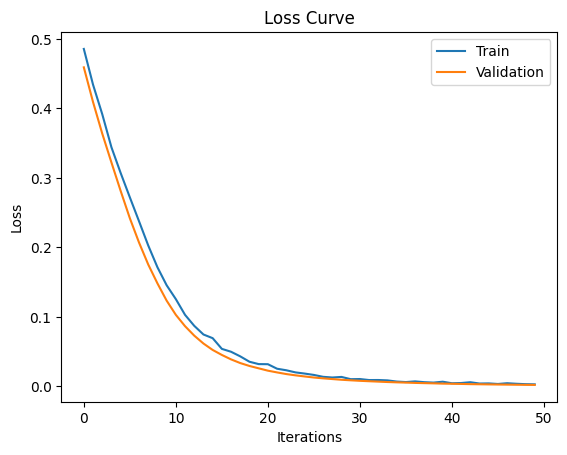

In [36]:
history = model.history.history
loss = history['loss']
val_loss = history['val_loss']

plt.plot(loss,label= 'Train')
plt.plot(val_loss, label= 'Validation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.plot()

[]

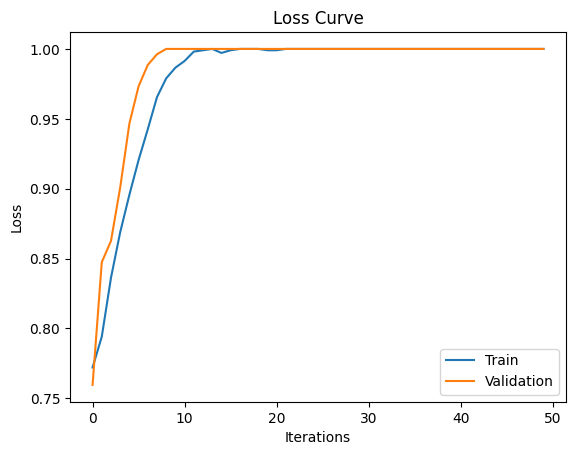

In [37]:
history = model.history.history
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

plt.plot(accuracy,label= 'Train')
plt.plot(val_accuracy, label= 'Validation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.plot()

In [53]:
y_pred=np.round(model.predict(x_test),1).astype(int)

9/9 [==============================] - 0s 1ms/step


In [55]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [61]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [62]:
confusion_matrix(y_test,y_pred)

array([[154,   0],
       [  0, 108]], dtype=int64)

In [63]:
print(f'True Negative = {tn}')
print(f'False Positive = {fp}')
print(f'False Negative = {fn}')
print(f'True Positive = {tp}')


True Negative = 154
False Positive = 0
False Negative = 0
True Positive = 108


*  <b>Accuracy</b> measures the overall correctness of predictions.
*  <b>Precision</b> measures the proportion of predicted positive instances that are actually positive.
*  <b>Recall</b> measures the proportion of actual positive instances that are correctly predicted as positive.
*  <b>F1 score</b> is a weighted harmonic mean of precision and recall, providing a balance between the two metrics.

In [66]:
Accuracy = (tp+ tn)/(tn+fp+fn+tp)
print(f'Accuracy = {Accuracy}')

Recall = tp/(tp+fn)
print(f'Recall = {Recall}')

Precision = tp/(tp+fp)
print(f'Precision = {Precision}')

F1_Score = 2*(Precision*Recall)/(Precision+Recall)
print(f'F1_Score = {F1_Score}')

Accuracy = 1.0
Recall = 1.0
Precision = 1.0
F1_Score = 1.0
